# Hacking light spectral distribution charts exported from a Sekonic Spectromaster C700 handheld spectrometer in Python



This notebook shows how to :

* Import light spectral distribution data from PNG image files gnerated by a Sekonic C700 handheld spectrometer
* Export the light spectral distribution data to various file formats
* Plot custom charts using spectral distribution data
* Compute custom metrics from spectral distribution data

How to use this notebook with your own files from a Sekonic C700
* Ensure you have exported spectral distribution charts in .png format to avoid compression artifacts
* Put all the files you want to process at the same time in one folder
* Modify lines 


################################
chartname : Cheap-COB_01
################################
Reading input file :  /Users/b12/Documents/SEKONIC/C-700Series/SpectralDist/Cheap-COB_01_3225K_SpectralDistribution.png
Spectral Irradiance data saved to NumPy format :  /Users/b12/Documents/SEKONIC/C-700Series/SpectralDist/Cheap-COB_01.npy
Spectral Irradiance data saved to JSON format /Users/b12/Documents/SEKONIC/C-700Series/SpectralDist/Cheap-COB_01.json
!!! To Do : Spectral Irradiance data saving to CSV format !!!
Spectral Irradiance chart saved to png format : 
/Users/b12/Documents/SEKONIC/C-700Series/SpectralDist/processed_charts/Cheap-COB_01_Spectral_Irradiance.png

################################
chartname : Cheap-COB_02
################################
Reading input file :  /Users/b12/Documents/SEKONIC/C-700Series/SpectralDist/Cheap-COB_02_3224K_SpectralDistribution.png
Spectral Irradiance data saved to NumPy format :  /Users/b12/Documents/SEKONIC/C-700Series/SpectralDist/Cheap-COB_02.n

Spectral Irradiance chart saved to png format : 
/Users/b12/Documents/SEKONIC/C-700Series/SpectralDist/processed_charts/Red-Chanzon_02_Spectral_Irradiance.png

################################
chartname : Red-Chanzon_03
################################
Reading input file :  /Users/b12/Documents/SEKONIC/C-700Series/SpectralDist/Red-Chanzon_03_Under_SpectralDistribution.png
Spectral Irradiance data saved to NumPy format :  /Users/b12/Documents/SEKONIC/C-700Series/SpectralDist/Red-Chanzon_03.npy
Spectral Irradiance data saved to JSON format /Users/b12/Documents/SEKONIC/C-700Series/SpectralDist/Red-Chanzon_03.json
!!! To Do : Spectral Irradiance data saving to CSV format !!!
Spectral Irradiance chart saved to png format : 
/Users/b12/Documents/SEKONIC/C-700Series/SpectralDist/processed_charts/Red-Chanzon_03_Spectral_Irradiance.png

################################
chartname : Red-Chanzon_04
################################
Reading input file :  /Users/b12/Documents/SEKONIC/C-700Series/Spec

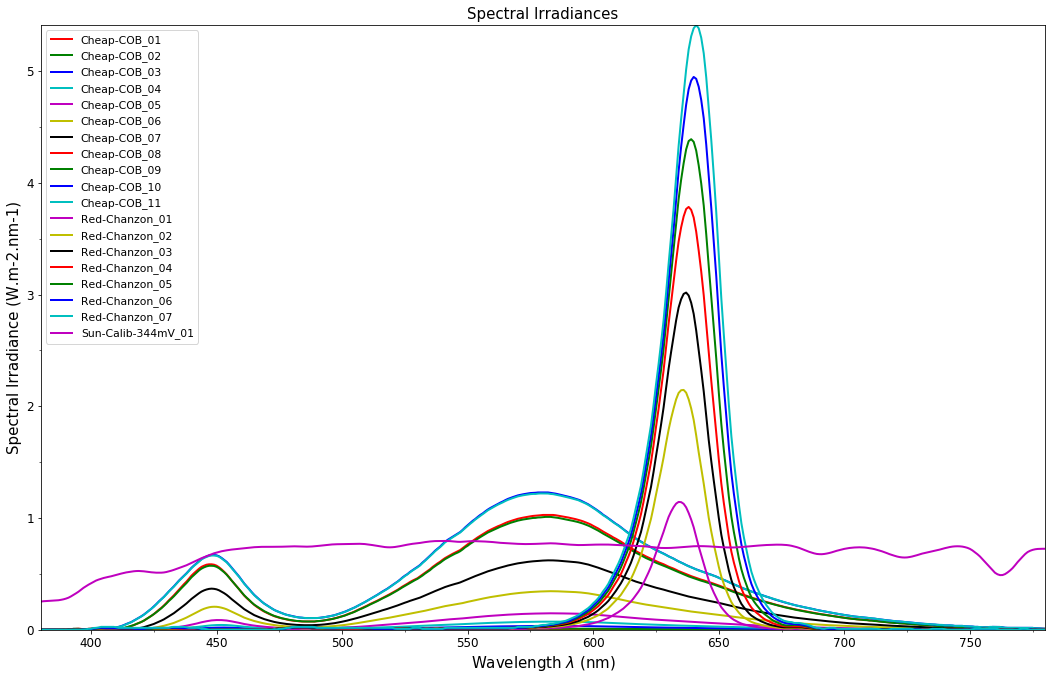

In [207]:
# Libraries imports
%matplotlib inline
import collections
import colour
import datetime
import os
import glob
from colour.plotting import *
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from skimage import data, io, filters


# Path to the folder containing the spectral distribution charts exported from a Sekonic C700
# All generated files will also be placed into that folder
filepath="/Users/b12/Documents/SEKONIC/C-700Series/SpectralDist/"
# multichartname1 and multichartname2 are concatenated to form the name of the generated multi chart
multichartname1 = "" # If set to an empty string, will be replaced by the first imported chart name
## ToDo: Remove the end of the first chart name when using it as multichartname1
multichartname2 = "_Multi_Spectral_Irradiance"
# List of files to process
#filenames=glob.glob(filepath+multiname+"*_SpectralDistribution.png")
filenames=sorted(glob.glob(filepath+"*_SpectralDistribution.png"))


colour.filter_warnings(True, False)
colour_plotting_defaults()


# File extention to use when saving to text file with json format
jsonExtension=".json"
# File extention to use when saving to binary file with numpy format
numpyExtension=".npy"

# Min value of C700 charts Y axis
ymin = 0
# max y axis value depends on the chart. 
# It is automatically recognized from the chart (hopefully) 
ymax = -1
# multiplication factor used during max y value determination
ymul = -1

#Wavelength range of C700 charts X axis
xmin = 380
xmax = 780

## Path to sample spectral distribution charts from my C700 ##
#
# ymax is the range of the chart, in W.m-2.nm-1, of the chart Y axis 
# chartname is the file name of the chart image, without the full folder 
# path or the extention. Those are defined above
#
# You can choose a different sample chart or select your own chart by changing the "filepath" and
# "chartname" variables below.  That is uncommented below and the  above 
# Exports to other formats will be saved in the same "filepath" folder as the source charts.
#
# It is recommeded to export the charts of the C700 using PNG file format
# This is to avoid issues with compression artifacts of JPEG format.
# This code has not been tested with charts in jpeg format or any other format than PNG

## ToDo : Use a more robust OCR technique to automatically get ymax and unit from the chart



# Sample chart from a C700 : 10 W/m2/nm Range
#ymax, ymul, chartname = 10, 1, "raw_charts/Red-Calib-125mV_01_Under_SpectralDistribution"

# Sample chart from a C700 :  5 W/m2/nm Range sample charts
#ymax, ymul, chartname = 5,1, "raw_charts/GG-UFO_04_Under_SpectralDistribution"

# Sample chart from a C700 :  1 W/m2/nm Range sample charts
#ymax, ymul, chartname = 1, 1, "raw_charts/CFL_02_2584K_SpectralDistribution"

# 0.5 W Range sample charts
#ymax, chartname = 0.5, "Red-Calib-4.7mV_01_Under_SpectralDistribution"

# 0.2 W Range sample charts
#ymax, chartname = 0.2, "LED-Blue-1.5mV_01_Over_SpectralDistribution"

# 5W Range sample charts
#ymax, chartname = 5, "Sun-Calib-427mV_01_5016K_SpectralDistribution"
#ymax, chartname = 5, "GG-UFO_01_Under_SpectralDistribution"
#ymax, chartname = 5, "GG-UFO_02_Under_SpectralDistribution"

# 1W Range sample charts
#ymax, ymul, chartname = 1, 1, "raw_charts/Sun-Calib-344mV_01_5119K_SpectralDistribution"
#ymax, ymul, chartname = 1, 1, "raw_charts/FS-230W-45.7mV_01_Under_SpectralDistribution"
#ymax, ymul, chartname = 1, 1, "raw_charts/LED-Blue_02_Over_SpectralDistribution"
#ymax, ymul, chartname = 1, 1, "raw_charts/LED-Blue_01_Over_SpectralDistribution"
#ymax, ymul, chartname = 1, 1, "raw_charts/LED-Yellow_01_2034K_SpectralDistribution"
#ymax, ymul, chartname = 1, 1, "raw_charts/GG-UFO_03_Over_SpectralDistribution"
#ymax, ymul, chartname = 1, 1, "raw_charts/LED-Cyan_01_Over_SpectralDistribution"
#ymax, ymul, chartname = 1, 1, "raw_charts/LED-Green_01_Over_SpectralDistribution"
#ymax, ymul, chartname = 1, 1, "raw_charts/LED-Deep-Red_01_Under_SpectralDistribution"
#ymax, ymul, chartname = 1, 1, "raw_charts/LED-FS-Chanzon_07_Under_SpectralDistribution"
#ymax, ymul, chartname = 1, 1, "raw_charts/LED-FS-GG_01_Under_SpectralDistribution"
#ymax, ymul, chartname = 1, 1, "raw_charts/LED-FS-MingBen_01_Under_SpectralDistribution"


# 0.5 W Range sample charts
#ymax, chartname = 0.5, "Red-Calib-4.7mV_01_Under_SpectralDistribution"
# 0.2 W Range sample charts
#ymax, chartname = 0.2, "LED-Blue-1.5mV_01_Over_SpectralDistribution"
#ymax, chartname = 0.2, "Sun-Calib-75.7mV_01_5134K_SpectralDistribution"

#ymax, ymul, chartname = 0.0001, 1000, "raw_charts/LED-1-Lux_01_Under_SpectralDistribution"

#GG Samples
#ymax, chartname = 5, "GG-Flo_01_FS"
#ymax, chartname = 1, "GG-Flo_02_FS"
#ymax, chartname = 1, "GG-Flo_03_FS"
#ymax, chartname = 0.2, "GG-Flo_04_CFL"
#ymax, chartname = 1, "GG-Flo_06_HPS"
#ymax, chartname = 5, "GG-Flo_08_HPS"
#ymax, chartname = 5, "GG-Flo_05_HPS"

# Red LED spatial distribution test
#ymax, chartname = 0.5, "LED-Red-3A-1m_01_Under_SpectralDistribution"
#ymax, chartname = 50E-3, "raw_charts/LED-Red-3A-1m_02_Under_SpectralDistribution"
#ymax, chartname = 0.1, "raw_charts/LED-Red-3A-1m_03_Under_SpectralDistribution"
#ymax, ymul, chartname = 0.1,1, "raw_charts/LED-Red-3A-1m_04_Under_SpectralDistribution"
#ymax, chartname = 0.2, "raw_charts/LED-Red-3A-1m_05_Under_SpectralDistribution"
#ymax, chartname = 0.2, "LED-Red-3A-1m_06_Under_SpectralDistribution"
#ymax, chartname = 0.5, "LED-Red-3A-1m_07_Under_SpectralDistribution"
#ymax, chartname = 0.5, "LED-Red-3A-1m_08_Under_SpectralDistribution"
#ymax, chartname = 0.2, "LED-Red-3A-1m_09_Under_SpectralDistribution"
#ymax, chartname = 0.2, "LED-Red-3A-1m_10_Under_SpectralDistribution"


#ymax, chartname = 0.5, "GG-Flo_01_Douche"
#ymax, chartname = 1, "GG-Flo_02_Carre"
#ymax, chartname = 5, "GG-Flo_03_UFO-1"
#ymax, chartname = 5, "GG-Flo_04_UFO-2"

#ymax, chartname = 1, "raw_charts/WarmWhite-Chanz_02_3171K_SpectralDistribution"
#ymax, chartname = 1, "raw_charts/FS-Tesfish_02_Under_SpectralDistribution"
#ymax, chartname = 5, "raw_charts/Red-Chanzon_01_Under_SpectralDistribution"
#ymax, chartname = 5, "raw_charts/Blue-Chanzon_01_Over_SpectralDistribution"
#ymax, chartname = 1, "raw_charts/Yellow-Focustech_04_2145K_SpectralDistribution"
#ymax, chartname = 0.5, "raw_charts/RED-Wide_02_Under_SpectralDistribution"
#ymax, chartname = 5, "raw_charts/Green-Chanzon_01_Over_SpectralDistribution"
#ymax, chartname = 1, "raw_charts/FS-Epileds_03_Under_SpectralDistribution"
#ymax, chartname = 1, "raw_charts/WarmWhite_01_3097K_SpectralDistribution"
#ymax, chartname = 0.5, "raw_charts/Yellow-Chanzon_01_1682K_SpectralDistribution"
#ymax, ymul,chartname = 5,1, "raw_charts/Cyan-Chanzon_01_Over_SpectralDistribution"

#ymax, ymul, chartname = 1e-3,1000,"OCR_01"
#ymax, ymul, chartname = 1e-4,1000,"OCR_02"
#ymax, ymul, chartname = 2e-3,1000,"OCR_06"
#ymax, ymul, chartname = 20e-3,1000,"OCR_09"
#ymul, chartname = 1, "OCR_11"

#filename = ''.join([filepath,chartname,chartExtension])


sp_data = {}
sp_sample = {}
filecount = 0
ymaxmax = -1
chartExtension=".png"
metric = {}

for filename in filenames :
 
    chartname, fileext = os.path.splitext(os.path.basename(filename))
    shortchartname = '_'.join(chartname.split('_')[0:-2])
    
    if not multichartname1 :
        multichartname1 = '_'.join(chartname.split('_')[0:-3])
    
    #print("Multi chart name :", multichartname1+multichartname2)
    
    print ("")
    print("################################")
    print("chartname :", shortchartname)
    print("################################")
    print("Reading input file : ", filename)
    
    #print("extension :", fileext)
    assert (fileext in ['.png','.PNG'])

    ymul = -1
    ymax = -1

    # Load image using skimage.io
    chart_image = io.imread(filename)

    # Show the type of data structure used to store the image in memory
    #print("")
    #print ("chart_image type is : ")
    #print (type(chart_image))

    # Show the dimentions of the ndarray.
    #print("")
    #print ("Image/Array dimention : ")
    #print (chart_image.shape)

    # check image dimention. It should be (1366, 1940, 4)
    assert(chart_image.shape == (1366, 1940, 4))

    # Show the image
    #print("")
    #print("Chart Image : ")
    #plt_im = plt.imshow(chart_image)
    #plt.show()

    # Extract the y axis range and the Y axis unit parts of the chart
    YMaxImg = chart_image[35:85,90:160,:]
    YUnitImg = np.rot90(chart_image[500:750,40:90,:], 3) #.transpose(1,0,2))

    # Save the  y axis range part of the chart as a numpy file
    #filename = ''.join([filepath,'OCR/YMax_',str(ymax*ymul),numpyExtension])
    #np.save(filename, YMaxImg) 

    # Save the  y axis legend part of the chart as a numpy file
    #filename = ''.join([filepath,'OCR/YUnit_',str(ymul),numpyExtension])
    #np.save(filename, YUnitImg) 

    filenameocrmapunit = ''.join([filepath,'OCR/ocrmapunit',numpyExtension])
    filenameocrmaprange = ''.join([filepath,'OCR/ocrmaprange',numpyExtension])

    ocrmapunit =np.load(filenameocrmapunit).item()
    ocrmaprange =np.load(filenameocrmaprange).item()

    # code used to bootstap the crude OCR mapping files
    #ocrmapunit = {ymul : [YUnitImg]}
    #ocrmaprange = {ymax*ymul : [YMaxImg]}
    #np.save(filenameocrmapunit, ocrmapunit) 
    #np.save(filenameocrmaprange, ocrmaprange) 

    ymulocr = -1
    ymaxocr = -1

    # Display the y axis unit part of the chart
    #print ("")
    #print("Y Axis Unit : ")
    #plt.imshow(YUnitImg) 
    #plt.show()

    #print()   
    for ymulref in ocrmapunit :
        i=-1
        patterns = ocrmapunit[ymulref]
        for YUnitImgRef in patterns :
            i+=1
            match = np.subtract(YUnitImgRef[:,:,0:3]/255.0, YUnitImg[:,:,0:3]/255.0)
            matched = sum(sum(sum((match*match))))**0.5
            if abs(matched) < 1.732 :
                #print ("Matching unit ", ymulref,', pattern ',i,' with confidence ', matched, ' : Matched !!!')
                ymulocr = ymulref            
                 # Display diff with matched pattern (for debug) 
                #absmatch = np.abs(match)
                #plt.imshow(absmatch) 
                #plt.show()
                #print (np.max(absmatch))
                break
            #else :
                #print ("Matching unit ", ymulref,', pattern ',i,' with confidence ', matched, ' : no match')
                # Display diff with failed pattern (for debug) 
                #absmatch = np.abs(match)
                #plt.imshow(absmatch) 
                #plt.show()
                #print (np.max(absmatch))
        if ymulocr>0 :
            break


    if ((ymulocr>0) and (ymul>0) and (abs(ymulocr - ymul) > 0)) :
        print()
        print ("Configured ymul is inconsistent with crude OCR result : ", ymul, ' -> ', ymulocr)
        ymul = -1
    elif ((ymulocr>0) and (ymul>0) and (abs(ymulocr - ymul) == 0 )) :
        print()
        print ("Configured ymul is consistent with crude OCR result : ", ymul, ' -> ', ymulocr)
    elif ((ymulocr>0) and (ymul < 0 )) :
        #print ("Found ymul using crude OCR : ", ymul, ' -> ', ymulocr)
        ymul = ymulocr
    elif ((ymulocr<0) and (ymul > 0 )) :      
        if ymul in ocrmapunit :
            print()
            print ("Updating ymul in OCR mapping : ", ymul, ' -> ', ymulocr)
            ocrmapunit[ymul]+=[YUnitImg]
        else :
            print()
            print ("Adding new ymul to OCR mapping : ", ymul, ' -> ', ymulocr)
            ocrmapunit[ymul] = [YUnitImg]
        #print (ocrmapunit)
        np.save(filenameocrmapunit, ocrmapunit) 
    elif ((ymulocr<0) and (ymul < 0 )) :   
        print()
        print ("No configured ymul and OCR mapping failed : ", ymul, ' -> ', ymulocr)

    assert ymul > 0

    # Display the y axis range part of the chart
    #print ("")
    #print("Y Axis Range : ")
    #plt.imshow(YMaxImg)
    #plt.show()

    #print()   
    for ymaxref in ocrmaprange :
        i = -1
        for YMaxImgRef in ocrmaprange[ymaxref] :
            i+=1
            match = np.subtract(YMaxImgRef[:,:,0:3]/255.0, YMaxImg[:,:,0:3]/255.0)
            matched = sum(sum(sum((match*match))))**0.5
            if abs(matched) < 1.732 :
                #print ("Matching range : ", ymaxref,', pattern ',i,' with confidence : ', 
                #       matched, ' : Matched !!!')
                ymaxocr = ymaxref  
                # Display diff with matched pattern (for debug) 
                #absmatch = np.abs(match)
                #plt.imshow(absmatch) 
                #plt.show()
                #print (np.max(absmatch))
                break
            #else :
                #print ("Matching range : ", ymaxref,', pattern ',i,' with confidence : ', 
                #       matched, ' : no match')
                # Display diff with failed pattern (for debug) 
                #absmatch = np.abs(match)
                #plt.imshow(absmatch) 
                #plt.show()
                #print (np.max(absmatch))
        if ymaxocr>0 :
            break

    if ymax > 0 and ymul > 0 :
        ymax = ymax * ymul
    if ((ymaxocr>0) and (ymax>0) and (abs(ymaxocr - ymax) > 0 )) :
        print()
        print ("Configured ymax is inconsistent with crude OCR result : ", ymax, ' -> ', ymaxocr)
        ymax = -1
    elif ((ymaxocr>0) and (ymax>0) and (abs(ymaxocr - ymax) == 0 )) :
        print()
        print ("Configured ymax is consistent with crude OCR result : ", ymax, ' -> ', ymaxocr)
    elif ((ymaxocr>0) and (ymax < 0 )) :
        #print()
        #print ("Found ymax using crude OCR : ", ymax, ' -> ', ymaxocr)
        ymax = ymaxocr
    elif ((ymaxocr<0) and (ymax > 0 ) and (ymul>0)) :       
        if ymax in ocrmaprange :
            print()
            print ("Updating ymax in OCR mapping : ", ymax, ' -> ', ymaxocr)
            ocrmaprange[ymax] += [YMaxImg]
        else :
            print()
            print ("Adding new ymax to OCR mapping : ", ymax, ' -> ', ymaxocr)
            ocrmaprange[ymax] = [YMaxImg]
        #print (ocrmapunit)
        np.save(filenameocrmaprange, ocrmaprange) 
    elif ((ymaxocr<0) and (ymax < 0 )) :   
        print()
        print ("No configured ymax and OCR mapping failed : ", ymax, ' -> ', ymaxocr)


    assert ymax > 0

    ymax = ymax / ymul
    
    #ymaxmax = max(ymax,ymaxmax) #This uses the same Y axis range as 
    #the C700 which is not really optomal in some cases


    # Save the  y axis legend parts of the chart as a numpy file

    # Display the x axis high range part of the chart. Should be 780
    # plt.imshow(chart_image[1100:1300,1750:1950,:])

    # Display the x axis low range part of the chart. Should be 380
    # plt.imshow(chart_image[1100:1300,100:300,:])

    # Crop the image along xmin/xmax/ymin/ymax to keep only the curve area 
    clean_chart_image = chart_image[61:1204,181:1880,:]

    #print()
    #print("Size of the truncated image :")
    #print(clean_chart_image.shape)

    height,width,depth = clean_chart_image.shape

    # This should show the cropped chart
    #plt_im = plt.imshow(clean_chart_image)

    ## Count curve heigh based on ration of count of pixels of non neutral 
    # color compared to pixels of neutral color
    # The area above the curve is either white or black. The area under 
    # the curve is quite saturated rainbow color

    # First build a mask by comparing the red and green channels
    mask1 = clean_chart_image[:,:,0] != clean_chart_image[:,:,1]
    # Then build another mask by comparing the green and blue channels
    mask2 = clean_chart_image[:,:,1] != clean_chart_image[:,:,2]
    # Combine both masks (dirty way to compute a Boolean OR of the 2 masks)
    mask = mask1 + mask2
    # Count the ratio of non neutral pixels
    spectrumRaw = (ymax-ymin)*(mask.mean(axis=0))+ymin

    ## Aggregate the data along the x axis to keep only one point per nm and store 
    # it into a dictionary with the wavelengths as the keys

    # Aggregation loop
    ## ToDo: There must be a better way 
    #ymaxmax = 0.0
    spd_data={}
    for i in range(xmin,xmax+1,1):
        x1=math.floor((i-xmin)*width/(xmax+1-xmin))   
        x2=math.ceil((i+1-xmin)*width/(xmax+1-xmin))
        #spectrumP[i]=spectrumRaw[i]*i*1e-9/(299792458*6.626E-34*6.022E23)
        #Store in dictionaries
        spd_data[i]=np.mean(spectrumRaw[x1:x2])
        ymaxmax = max(ymaxmax, spd_data[i])
        #spd_dataP[i]=spectrumP[i]

    #print("ymaxmax=",ymaxmax," / ",np.max(np.array(list(spd_data.values())))," / ", np.max(spectrumRaw[xmin:xmax+1]))
    
    spdSample = colour.SpectralPowerDistribution(shortchartname, spd_data)
    sp_data[shortchartname] = spd_data
    sp_sample[shortchartname] = spdSample


    # Save the spectral distribution data as a numpy file
    filename = ''.join([filepath,shortchartname,numpyExtension])
    np.save(filename, spd_data) 
    print ("Spectral Irradiance data saved to NumPy format : ",filename)

    # Save the spectral distribution data as a json file
    filename = ''.join([filepath,shortchartname,jsonExtension])
    json.dump(spd_data, open(filename,'w'))
    print ("Spectral Irradiance data saved to JSON format",filename)
 
    ## ToDo : Save to csv format
    #filename = ''.join([filepath,chartname,csvExtension])
    print ("!!! To Do : Spectral Irradiance data saving to CSV format !!!")


    # Make a custom plot of the spectral power distribution and save the chart to a file.
    newfilename = ''.join([filepath,'processed_charts/',shortchartname,"_Spectral_Irradiance",chartExtension])

    ## ToDo: Save chart to image correctly (fname is a hack in my copy of the library)
    single_spd_plot(spdSample, bounding_box=[380,780, 0, ymax],
                    title=shortchartname + ' Spectral Irradiance', 
                    y_label='Spectral Irradiance  (W.m-2.nm-1)', 
                    fname=newfilename)

    print ("Spectral Irradiance chart saved to png format : ")
    print (newfilename)

    # Make another instance of the custom plot of the spectral power 
    # distribution for displaying in the notebook.
    ## ToDo : Is there any good way to build the chart only once ?
    #single_spd_plot(spdSample, bounding_box=[380,780, 0, ymax], 
    #                title=chartname + ' Spectral Irradiance', 
    #                y_label='Spectral Irradiance (W.m-2.nm-1)')

    
print ("")

# Make a multi plot of all spectral power distributions and save the chart to a file.
newfilename = os.path.join(filepath,'processed_charts/',multichartname1+multichartname2+'_{:%Y-%m-%d_%H-%M-%S}'.format(datetime.datetime.now())+chartExtension)
multi_spd_plot(sp_sample.values(), bounding_box=[380,780, 0, ymaxmax], 
               use_spds_colours=False, title='Spectral Irradiances', 
               y_label='Spectral Irradiance (W.m-2.nm-1)',
               fname=newfilename)
print ("Multi plot spectral irradiance chart saved to png format : ")
print (newfilename)

# Make another instance of the chart 
# for displaying in the notebook.
## ToDo : Is there any good way to build the chart only once ?
multi_spd_plot(sp_sample.values(), bounding_box=[380,780, 0, ymaxmax], 
               use_spds_colours=False, title='Spectral Irradiances', 
               y_label='Spectral Irradiance (W.m-2.nm-1)')               


### Lets do some custom computations and charts with the data we have extracted and saved to files

Solar PPFD simulator : 
https://asianturfgrass.shinyapps.io/ppfd_by_time/ (https://github.com/micahwoods/ppfd_by_time)

ToDo : Use the above simulator and a population of measures to check the compuation of PPFD 

http://www.fao.org/docrep/x0490e/x0490e07.htm#radiation

Dynamics of photosynthetic photon flux density (PPFD) and estimates in coastal northern California :
https://link.springer.com/article/10.1007/s00704-010-0368-6



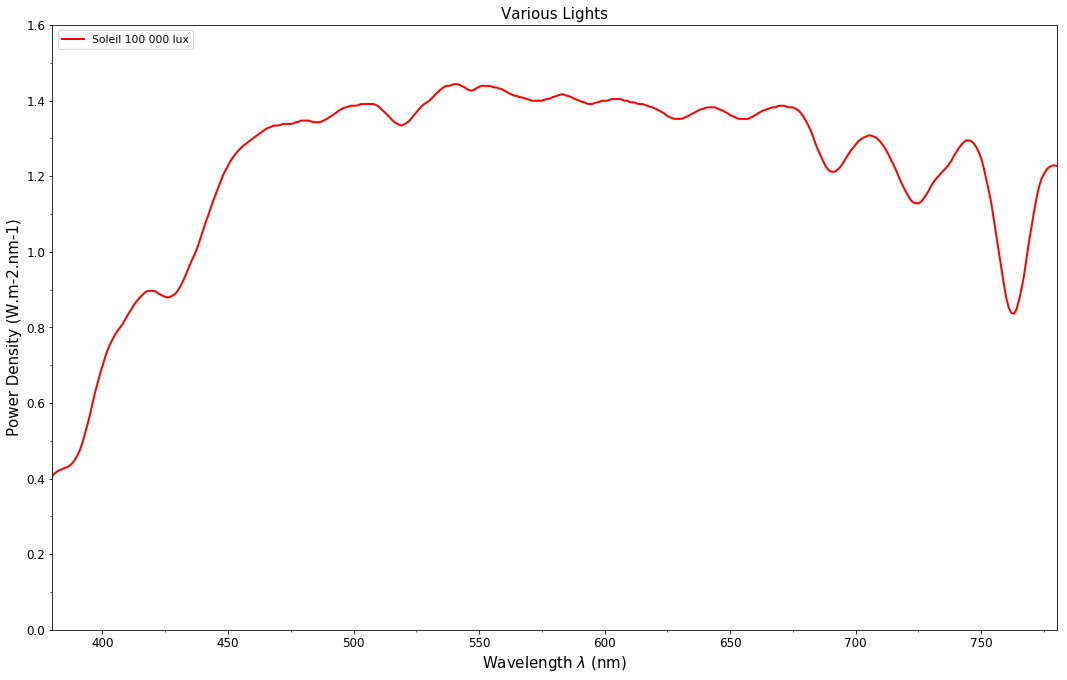

In [146]:

filename = ''.join([filepath,'spectral_data/Sun-Calib-427mV_01_5016K_SpectralDistribution',numpyExtension])
#filename = ''.join([filepath,'Sun-Calib-344mV_01_5119K_SpectralDistribution',numpyExtension])
spd_dict_Sun = np.load(filename).item()
spdW_ref_Sun = colour.SpectralPowerDistribution('Soleil 100 000 lux', spd_dict_Sun)


multi_spd_plot([spdW_ref_Sun], bounding_box=[380,780, 0, 1.6], 
                use_spds_colours=False, title='Various Lights', y_label='Power Density (W.m-2.nm-1)')


Let's take the Mc Cree curve as a luminous efficiency function.

Source :

McCREE, K. J., 1972. The action spectrum, absorptance and quantum yield of photosynthesis
in crop plants. Agrie. MeteoroL, 9: 191-216.
http://www.inda-gro.com/IG/sites/default/files/pdf/ACTION-SPECTRUM-KJMCCREE.pdf

--- excerpt ---

```
PHOTOSYNTHESIS IN CROP PLANTS 
...
RELATIVE ACTION OF FIELD PLANT SPECIES 

nm  1    3    4    6    7    8    18   20   Mean 
350 0.01 0.01 0.00 0.00 0.01 0.02 0.00 0.02 0.01
375 0.06 0.05 0.09 0.05 0.09 0.09 0.10 0.05 0.07
400 0.40 0.25 0.32 0.24 0.26 0.27 0.32 0.20 0.28
425 0.49 0.47 0.50 0.50 0.51 0.48 0.44 0.44 0.48
450 0.55 0.51 0.55 0.55 0.52 0.55 0.49 0.44 0.52
475 0.51 0.51 0.50 0.52 0.49 0.55 0.48 0.41 0.49
500 0.55 0.55 0.53 0.51 0.52 0.55 0.53 0.46 0.53
525 0.53 0.59 0.56 0.54 0.58 0.57 0.52 0.51 0.55
550 0.58 0.67 0.60 0.57 0.60 0.65 0.57 0.57 0.60
575 0.73 0.80 0.78 0.73 0.72 0.79 0.70 0.69 0.74
600 0.85 0.90 0.88 0.84 0.87 0.88 0.88 0.85 0.87
625 0.97 1.00 0.98 0.94 0.94 0.97 1.00 0.95 0.97
650 0.98 0.95 0.93 0.93 0.95 0.92 0.93 0.91 0.94
675 1.00 1.00 1.00 1.00 1.00 1.00 0.98 1.00 1.00
700 0.46 0.50 0.52 0.47 0.46 0.43 0.43 0.46 0.47
725 0.13 0.12 0.13 0.09 0.11 0.08 0.09 0.09 0.10
750 0.03 0.03 0.03 0.02 0.04 0.02 0.02 0.02 0.03 

THE AVERAGE PLANT 
...
The same basic shape of curve was encountered in all species of green plant
tested. The spectral quantum yield was always composed of three curves, with
peaks at 440, 620 and 670 nm, +/-10 nm. 
...
```

--- end of excerpt ---


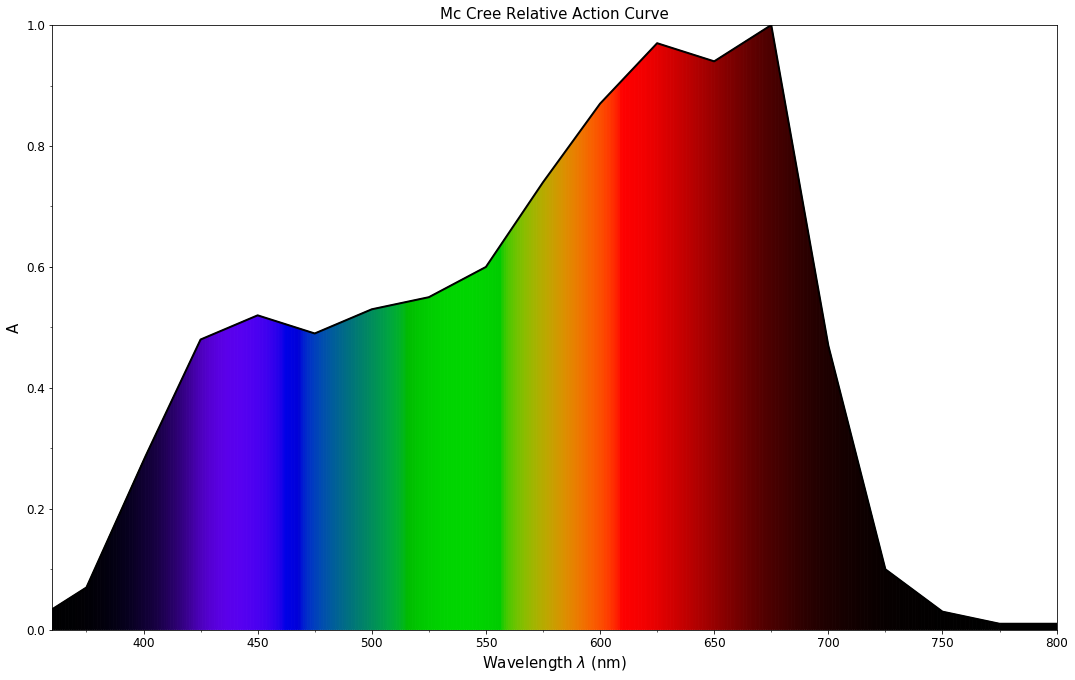

In [147]:
# Mean relative action curve data from the paper cited above as a dictionary {wavelength : action}
relativeAction = {
350 : 0.01,
375 : 0.07,
400 : 0.28,
425 : 0.48,
450 : 0.52,
475 : 0.49,
500 : 0.53,
525 : 0.55,
550 : 0.60,
575 : 0.74,
600 : 0.87,
625 : 0.97,
650 : 0.94,
675 : 1.00,
700 : 0.47,
725 : 0.10,
750 : 0.03, 
775 : 0.01,   # This data point is not from McCREE
800 : 0.01,   # This data point is not from McCREE
}

spd_action = colour.SpectralPowerDistribution('Relative Action', relativeAction)

#filename = ''.join([filepath,'Relative_Action.png'])
single_spd_plot(spd_action, title='Mc Cree Relative Action Curve', 
                y_label='A') #, fname=filename)

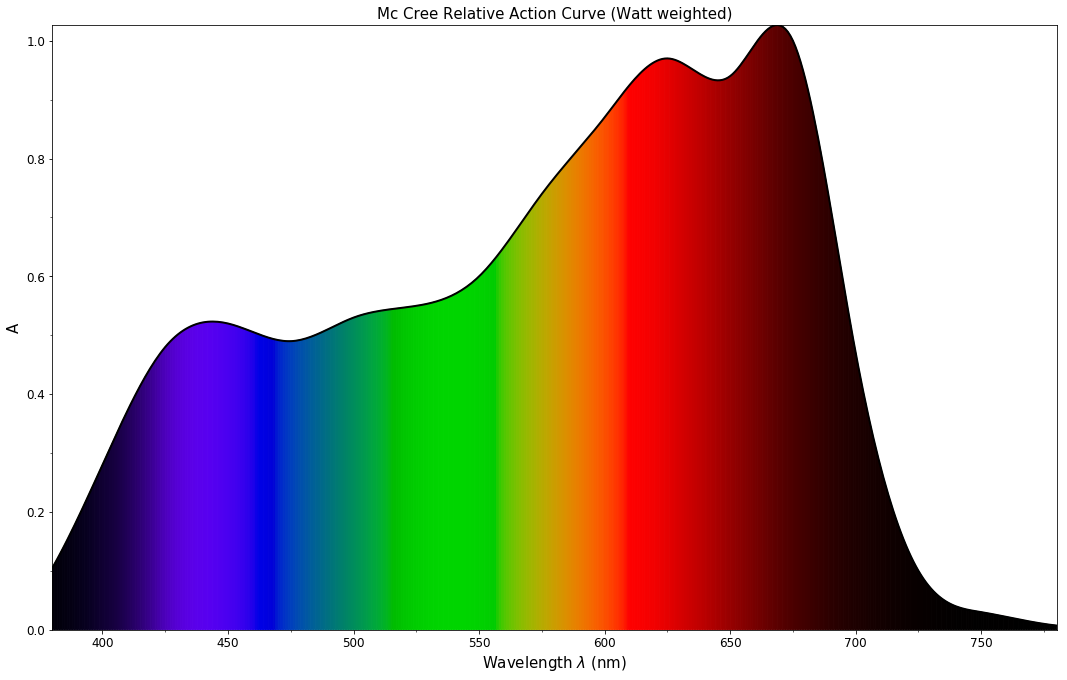

In [148]:
wavelength_380_780 = np.arange(380,781)
#value = np.interp(wavelength,np.array(list(relativeAction.keys())),np.array(list(relativeAction.values())))

## ToDo use the interpolation function of the colour science library instead
relativeActionInterpolated=sp.interpolate.interp1d(np.array(list(relativeAction.keys())),
                              np.array(list(relativeAction.values())),
                             kind="cubic")(wavelength_380_780)

spd_action_interpolated = colour.SpectralPowerDistribution('Relative Action (Watt)',dict(zip(wavelength_380_780,relativeActionInterpolated)))
#filename = ''.join([filepath,'Relative_Action_Interpolated.png'])
single_spd_plot(spd_action_interpolated, title='Mc Cree Relative Action Curve (Watt weighted)', 
                y_label='A' ) #, fname=filename)

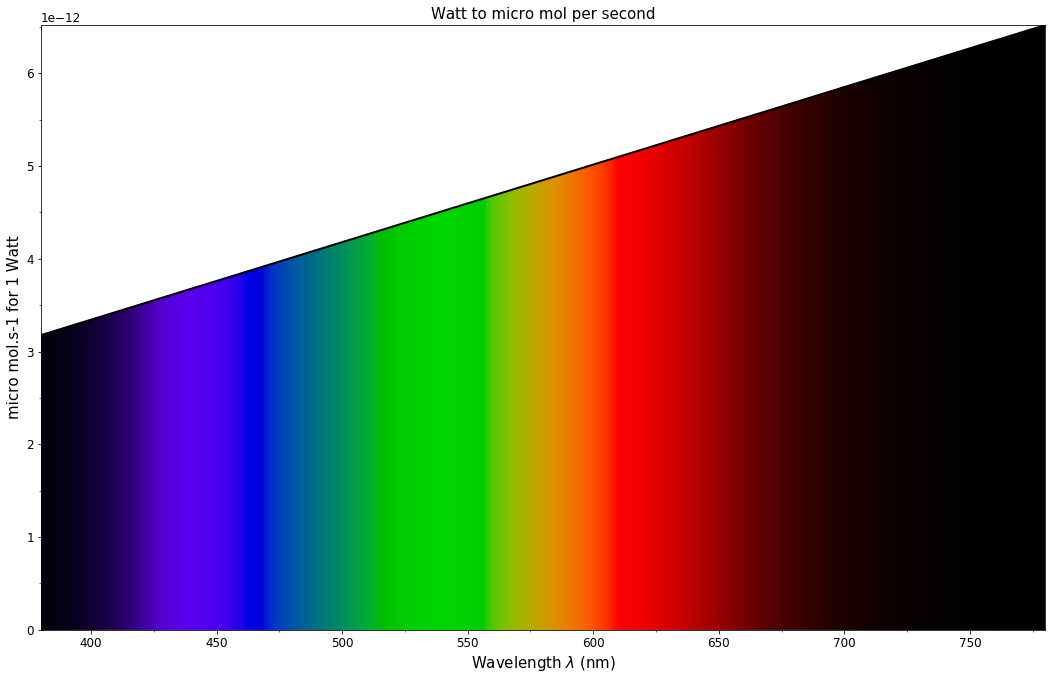

In [149]:
## Convert W to mole of photon / s
# E = hc/L where: 
#    E is the energy of a photon measured in Joules (J)
#    h is the Planck constant (6.626E-34 J*s) 
#    c is the speed of light (299792458 m/s) 
#    L is the wavelength of the photon measured in meters (m)
# Also we need Avagadro’s constant (A = 6.022 * 10^23)
watttomole = np.zeros(781-380)
for i in range(380,781,1):
    watttomole[i-380]=i*1e-9/(299792458*6.626E-34*6.022E23)

spd_watttomol = colour.SpectralPowerDistribution('Watt to micro mole', dict(zip(wavelength_380_780,watttomole/1000000)))
single_spd_plot(spd_watttomol, title='Watt to micro mol per second', 
                y_label='micro mol.s-1 for 1 Watt')

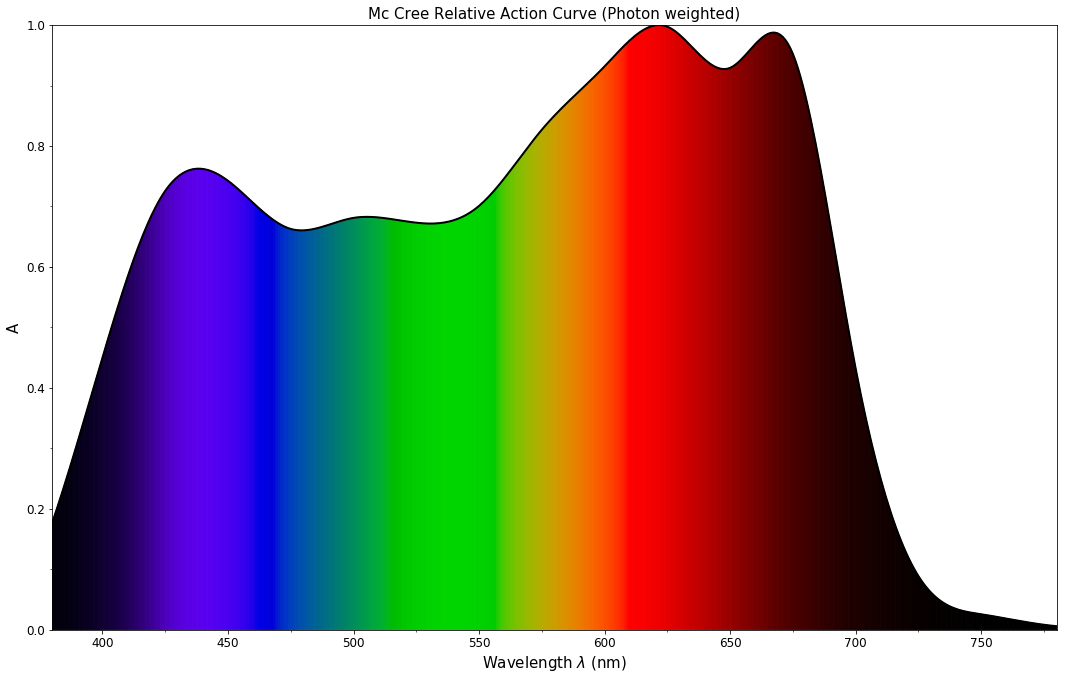

In [150]:
    
relativeActionPhotons = relativeActionInterpolated/watttomol
relativeActionPhotons = relativeActionPhotons / np.max(relativeActionPhotons)

spd_relativeActionPhotons = colour.SpectralPowerDistribution('Relative Action (Photon)'
                                                             ,dict(zip(wavelength_380_780,relativeActionPhotons)))
single_spd_plot(spd_relativeActionPhotons, title='Mc Cree Relative Action Curve (Photon weighted)', 
                y_label='A') #, fname=filename)

Now that we have our luminous efficiency function, lets look at some light power spectrum distribution through this function and lets compute something similar to Lux based on this function

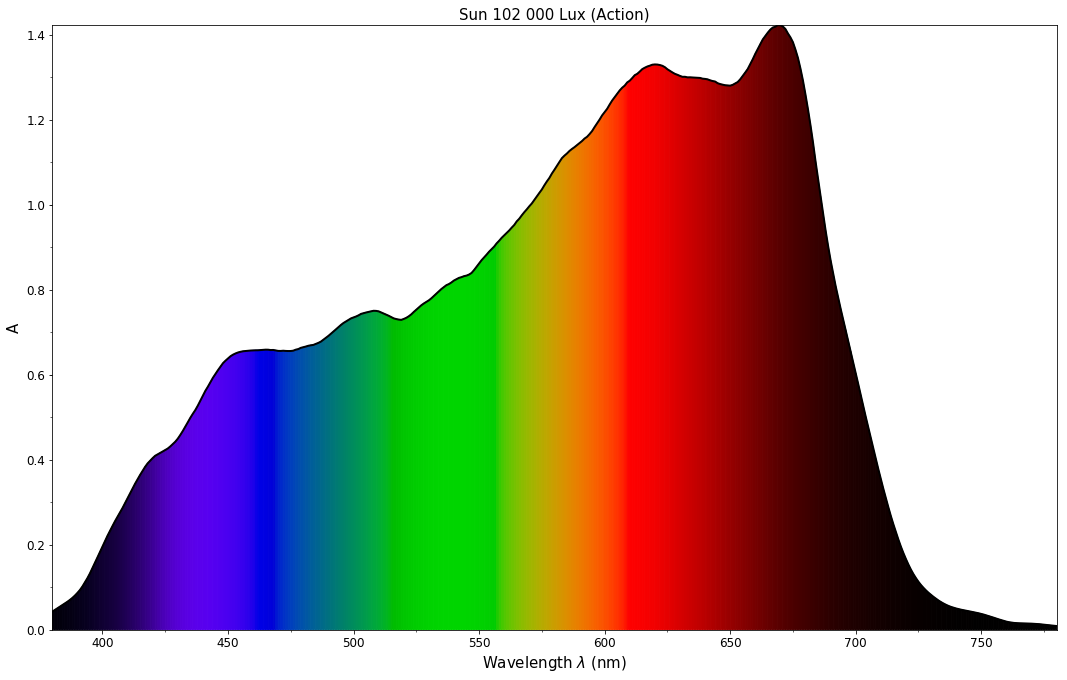

In [151]:
# The sun measured at 102 000 Lux : 
spd_values = np.array(list(spd_dict_Sun.values())) * relativeActionInterpolated
spd = colour.SpectralPowerDistribution('Sun 102 000 Lux (Action)'
                                       ,dict(zip(wavelength_380_780,spd_values)))
single_spd_plot(spd, title='Sun 102 000 Lux (Action)', 
                y_label='A') #, fname=filename)

In [152]:
# Lets compute the area under this curve

print (np.sum(spd_values))


281.166966463


In [202]:
# Lets define the Pux, a fictional unit, as being the value of the area under the spectral action 
# curve scaled so that it is equal to the Lux for the sample power distribution of the sun measured at 102000 Lux

print ("Sun measured at 102000 Lux by the C700 : ", int(round(SunLux)))

# First method to compute Pux value
SunLux=colour.luminous_flux(spdW_ref_Sun) 
print ("Luminous flux  (Lux) :", int(round(SunLux)))
SunAction = np.sum(spd_values)
PuxK = SunLux / SunAction
print("PuxK :", PuxK)
SunPux1 = np.sum(spd_values) * PuxK
print ("Pux1 of the sun measured at 102000 Lux (Pux) :", int(round(SunPux1)))

# Second method to compute Pux value using colour science library 
# luminous_flux function with a custom luminous efficiency function 
PuxK2 = SunLux/colour.luminous_flux(spdW_ref_Sun, spd_action, 1) 
print("PuxK2 :", PuxK2)

SunPux2=colour.luminous_flux(spdW_ref_Sun, spd_action, PuxK2) 
print ("Pux2 of the sun measured at 102000 Lux (Pux) :", int(round(SunPux2)))

# PPFD
SunPpfd = np.sum(np.array(list(spd_dict_Sun.values())) * watttomole) * 1000000 
print ("PPFD of the sun measured at 102000 Lux (umol/m2/s) :", int(round(SunPpfd)))
SunYpfd = np.sum(np.array(list(spd_dict_Sun.values())) * watttomole * relativeActionInterpolated) * 1000000 
print ("YPFD of the sun measured at 102000 Lux (umol/m2/s) :", int(round(SunYpfd)))

# convert spectral distribution to CIE XYZ
#SunXYZ = colour.spectral_to_XYZ(spdW_ref_Sun)
# normalized chromaticity values (xy) :
#SunX=SunXYZ[0]/(SunXYZ[0]+SunXYZ[1]+SunXYZ[2])
#SunY=SunXYZ[1]/(SunXYZ[0]+SunXYZ[1]+SunXYZ[2])
# Get Coordinated Color Temperature from normalized chomaticity
#SunCCT = colour.xy_to_CCT([SunX,SunY]) 
SunCCT = colour.xy_to_CCT(colour.XYZ_to_xy(colour.spectral_to_XYZ(spdW_ref_Sun))) 
print ("CCT of the sun measured at 102000 Lux (K) :", int(round(SunCCT)))

SunCRI = colour.colour_rendering_index(spdW_ref_Sun)
print ("CRI of the sun measured at 102000 Lux (K) :", int(round(SunCRI)))

SunPeakWavelength = list(spd_dict_Sun.keys())[np.argmax(np.array(list(spd_dict_Sun.values())))]
print ("Peak wavelength of the sun measured at 102000 Lux (nm) :", SunPeakWavelength)

SunPeakIradiance = np.max(np.array(list(spd_dict_Sun.values())))
print ("Peak irradiance of the sun measured at 102000 Lux (W/m2/s) :", SunPeakIradiance)


Sun measured at 102000 Lux by the C700 :  101964
Luminous flux  (Lux) : 101964
PuxK : 362.645125006
Pux1 of the sun measured at 102000 Lux (Pux) : 101964
PuxK2 : 362.687885699
Pux2 of the sun measured at 102000 Lux (Pux) : 101964
PPFD of the sun measured at 102000 Lux (umol/m2/s) : 2423
YPFD of the sun measured at 102000 Lux (umol/m2/s) : 1366
CCT of the sun measured at 102000 Lux (K) : 5027
CRI of the sun measured at 102000 Lux (K) : 99
Peak wavelength of the sun measured at 102000 Lux (nm) : 540
Peak irradiance of the sun measured at 102000 Lux (W/m2/s) : 1.44356955381


In [194]:
def medianfromdistribution(keys, values) :
    isum = 0
    imed = np.sum(values) / 2
    i = 0
    while isum < imed :
        isum += values[i] 
        i += 1    
    return keys[i]

def medianfromdistributiondict(d) :
    values = np.array(list(d.values()))
    keys = list(d.keys())
    return medianfromdistribution(keys, values)


print("Median Irradance Wavelength of the sun :", medianfromdistributiondict(spd_dict_Sun), "nm")

Median Irradance Wavelength of the sun : 589 nm


CSV:
name,Irradiance (W/m2/s),Peak Spectral Irradiance (W/m2/s/nm),Peak Spectral Irradiance wavelength (nm),Median Spectral Irradiance wavelength (nm),Peak Spectral Photons (W/m2/s/nm),Peak Spectral Photons wavelength (nm),Median Spectral Photons wavelength (nm),Luminous Flux  (Lux),Photosyntetic Flux (Pux),Photosyntetic Flux (Pux) (2nd method),PPFD (umol/m2/s),YPFD (umol/m2/s),CCT (K),CRI (NU)
Cheap-COB_01,0.232814114902,0.001791776028,584,581,0.00876667129295,587,587,87,62,62,1,1,3243,62
Cheap-COB_02,1.28731116944,0.00994750656168,583,581,0.0486043434923,585,587,483,342,343,6,5,3242,62
Cheap-COB_03,4.47685331,0.0346019247594,583,581,0.169002778868,585,587,1675,1191,1191,22,16,3236,62
Cheap-COB_04,9.4764421114,0.0732283464567,583,581,0.35768689401,585,587,3542,2520,2520,46,34,3240,62
Cheap-COB_05,19.1244852727,0.147681539808,583,581,0.721192617875,585,587,7137,5083,5084,92,69,3239,62
Cheap-COB_06,44.8461650627,0.345581802275,583,581,1.68703280273,585,586,16667,11899,11901,215,160,3249

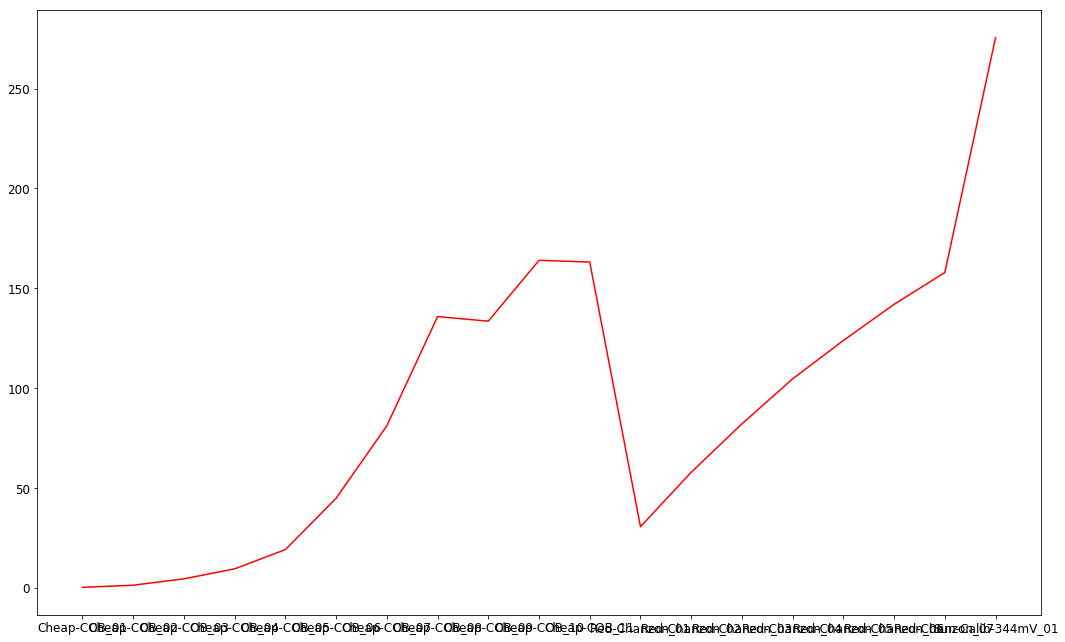

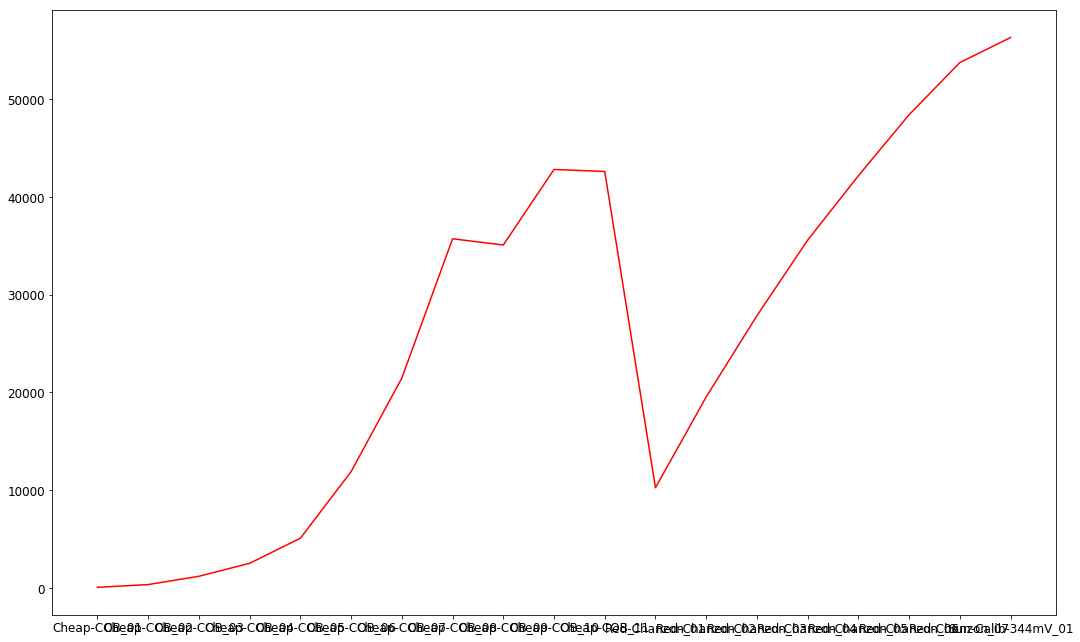

In [208]:
# Now lets compute the Pux value of some other lights


#pd_ref_Sun2 = colour.SpectralPowerDistribution('Sun 55800 Lux', spd_dict_Sun2)
print("CSV:")
print(','.join(["name",
                "Irradiance (W/m2/s)", 
                "Peak Spectral Irradiance (W/m2/s/nm)", 
                "Peak Spectral Irradiance wavelength (nm)", 
                "Median Spectral Irradiance wavelength (nm)", 
                "Peak Spectral Photons (W/m2/s/nm)", 
                "Peak Spectral Photons wavelength (nm)", 
                "Median Spectral Photons wavelength (nm)", 
                "Luminous Flux  (Lux)", 
                "Photosyntetic Flux (Pux)", 
                "Photosyntetic Flux (Pux) (2nd method)", 
                "PPFD (umol/m2/s)", 
                "YPFD (umol/m2/s)", 
                "CCT (K)", 
                "CRI (NU)"]))


irradiance = []
pux = []
x = []
i=-1
for spk,spd in sorted(sp_data.items()) : # sorted by chart name
    i += 1    
    x.append(spk)
    
    sp_keys = list(sp_data[spk].keys())
    sp_array = np.array(list(sp_data[spk].values()))
    sp_array_photons = sp_array * watttomole

    ispi = np.sum(sp_array)
    irradiance.append(ispi)
    
    iPeakIrradianceWavelength = sp_keys[np.argmax(sp_array)]
    iPeakIrradiance = np.max( sp_array)
    
    iMedIrradianceWavelength = medianfromdistribution(sp_keys,sp_array)
    iMedPhotonsWavelength = medianfromdistribution(sp_keys,sp_array_photons)
    
    iPeakPhotonsWavelength = sp_keys[np.argmax(sp_array_photons)]
    iPeakPhotons = np.max(sp_array_photons) * 1000000    
    
    ilux=colour.luminous_flux(sp_sample[spk])
    
    ipux1 = PuxK * np.sum(sp_array * relativeActionInterpolated)
    ipux2 = colour.luminous_flux(sp_sample[spk], spd_action, PuxK2)
    pux.append(ipux1)
    
    
    ippfd = np.sum(sp_array_photons) * 1000000 
    iypfd = np.sum(sp_array_photons * relativeActionInterpolated) * 1000000 

    iCCT = colour.xy_to_CCT(colour.XYZ_to_xy(colour.spectral_to_XYZ(sp_sample[spk]))) 
    iCRI = colour.colour_rendering_index(sp_sample[spk])
    
    print(','.join([spk,
          str(ispi), 
          str(iPeakIrradiance),           
          str(iPeakIrradianceWavelength),
          str(iMedIrradianceWavelength),
          str(iPeakPhotons),           
          str(iPeakPhotonsWavelength),
          str(iMedPhotonsWavelength),
          str(int(round(ilux))), 
          str(int(round(ipux1))), 
          str(int(round(ipux2))), 
          str(int(round(ippfd))), 
          str(int(round(iypfd))), 
          str(int(round(iCCT))), 
          str(int(round(iCRI)))]))


plt.plot(x, irradiance)
plt.plot()
plt.show()

plt.plot(x, pux)
plt.plot()
plt.show()


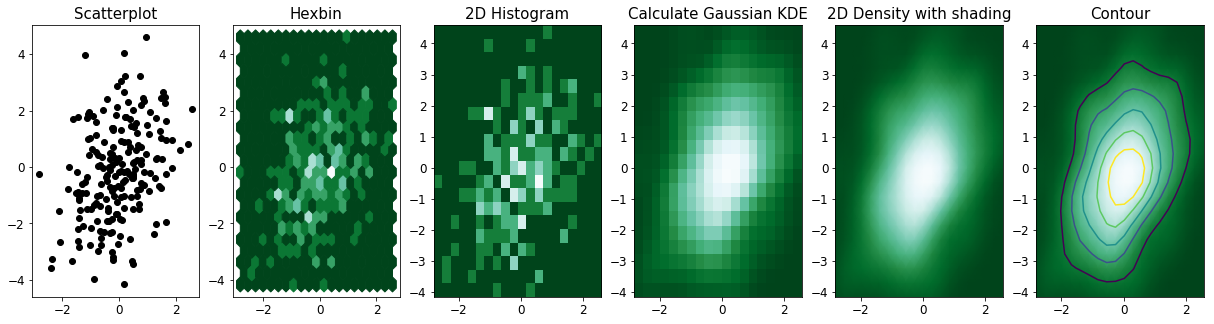

In [155]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
 
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )


In [156]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 10.0, 10.0

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(0, 50 + dy, dy),
                slice(0, 70 + dx, dx)]

print (x)
print(y)

z = np.array(pux).reshape(x[:-1,:-1].shape)
zw = np.array(irradiance).reshape(x[:-1,:-1].shape)
#z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
#z = z[:-1, :-1]

z[0,-1] = 0
#z=z/np.max(z)
print(z)

levels = MaxNLocator(nbins=31).tick_values(0, z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('seismic')
#cmap = plt.get_cmap('bwr')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, ax = plt.subplots(ncols=1,nrows=1)

#im = ax.pcolormesh(x, y, z, cmap=cmap, norm=norm)
#fig.colorbar(im, ax=ax)
#ax.set_title('pcolormesh with levels')


#In case your data is noisy, you should consider filtering it instead:

#rom numpy import loadtxt
#from scipy.ndimage.filters import gaussian_filter
#from matplotlib.pyplot import contour, show

#sigma = 0.7 # this depends on how noisy your data is, play with it!
#data = loadtxt('data.txt')
#data = gaussian_filter(data, sigma)
#contour(data)
#show()


# contours are *point* based plots, so convert our bound into point
# centers
#cf = ax.contourf(x[:-1, :-1] + dx/2.,
#                  y[:-1, :-1] + dy/2., z, levels=levels,
#                  cmap=cmap)
#ax.set_title('contourf with levels')



#ci = ax.imshow(z, cmap=cmap)
#ci = ax.imshow(z,interpolation='gaussian', cmap=cmap)
ci = ax.imshow(z,interpolation='lanczos', cmap=cmap)

ax.set_title("Distribution >Spatiale de l'Eclairement Photosynthétique (Pux)")
fig.colorbar(ci, ax=ax)
ax.set_ylim([-1,5])
ax.set_xlim([-1,7])

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()
newfilename = os.path.join(filepath,'processed_charts/',multiname+"_Spacial_Pux"+chartExtension)
fig.savefig(newfilename, bbox_inches='tight')

plt.show()

[[  0.  10.  20.  30.  40.  50.  60.  70.]
 [  0.  10.  20.  30.  40.  50.  60.  70.]
 [  0.  10.  20.  30.  40.  50.  60.  70.]
 [  0.  10.  20.  30.  40.  50.  60.  70.]
 [  0.  10.  20.  30.  40.  50.  60.  70.]
 [  0.  10.  20.  30.  40.  50.  60.  70.]]
[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.]
 [ 20.  20.  20.  20.  20.  20.  20.  20.]
 [ 30.  30.  30.  30.  30.  30.  30.  30.]
 [ 40.  40.  40.  40.  40.  40.  40.  40.]
 [ 50.  50.  50.  50.  50.  50.  50.  50.]]


ValueError: cannot reshape array of size 28 into shape (5,7)